In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
filename = 'data_5x5_eqk_neg_ellre.feather'
file = pd.read_feather(filename)
#file = file[(file.iloc[:, 0] > 0.493) & (file.iloc[:, 0] < 0.494)]

In [8]:
#features = file.iloc[:, 1:]
#labels = file.iloc[:, 0]
pt_x = file.iloc[:, 0]
pt_y = file.iloc[:, 1]
e = file.iloc[:, 2]
r = file.iloc[:, 3]
labels = file.iloc[:, 4]
features = file.iloc[:, 5:]
print([int(features.shape[0]), int(np.sqrt(features.shape[1])), int(np.sqrt(features.shape[1]))])
features = np.reshape(features.values, (int(features.shape[0]), int(np.sqrt(features.shape[1])), int(np.sqrt(features.shape[1]))))

[996465, 5, 5]


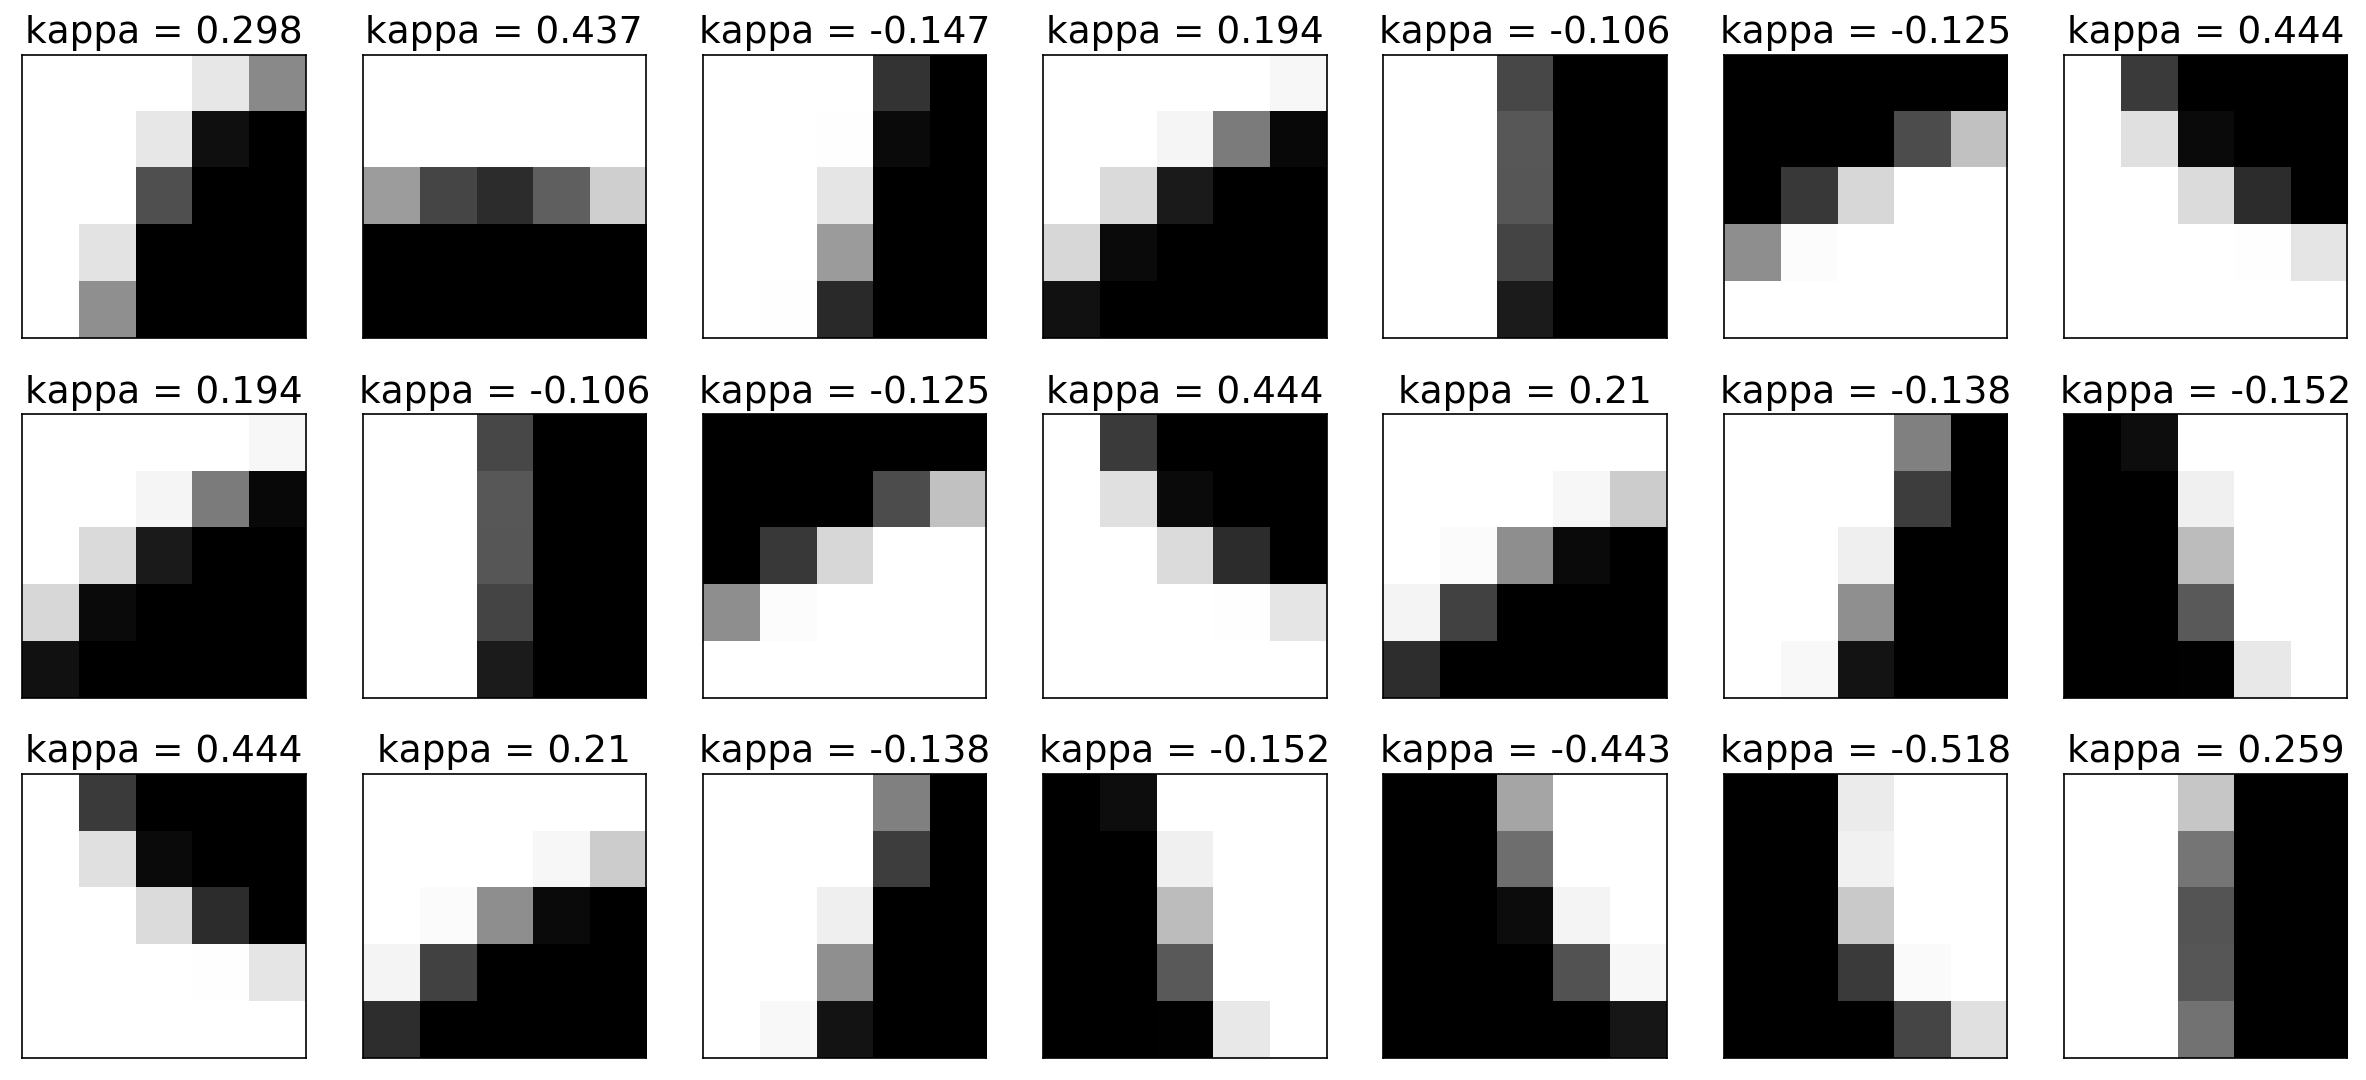

In [15]:
number_of_plots = 21
per_row = 7
fig, ax = plt.subplots(int(number_of_plots/per_row), per_row, figsize=(20, int(number_of_plots/per_row*3)), dpi=150)
for idx_st, a_stack in enumerate(ax):
    for idx, a in enumerate(a_stack):
        a.imshow(features[idx+int(idx_st*number_of_plots/per_row)], cmap='Greys_r')
        a.get_xaxis().set_ticks([])
        a.get_yaxis().set_ticks([])
        kappa = labels.iloc[idx + int(idx_st*number_of_plots/per_row)]
        a.set_title(f'kappa = {np.round(kappa, 3)}', fontsize=18)

In [58]:
file.iloc[:, 0].nunique()

996332

In [59]:
[file.iloc[:, 0].max(), file.iloc[:, 0].min(), np.abs(file.iloc[:, 0]).min()]

[1.4452181804662991, -1.5235287235544106, 5.743718123514541e-09]

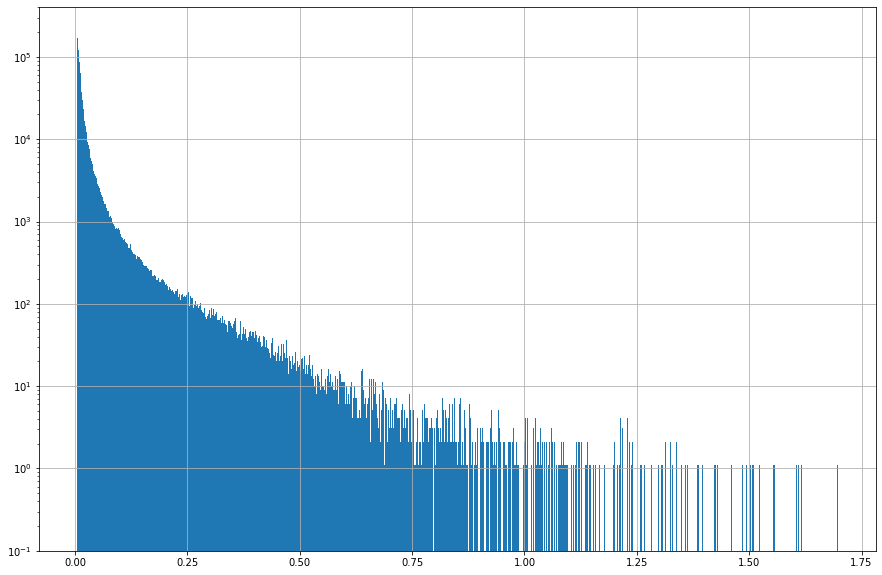

In [60]:
fig, ax = plt.subplots(figsize=(15,10))
r.hist(ax=ax, bins=1000, bottom=0.1)
ax.set_yscale('log')

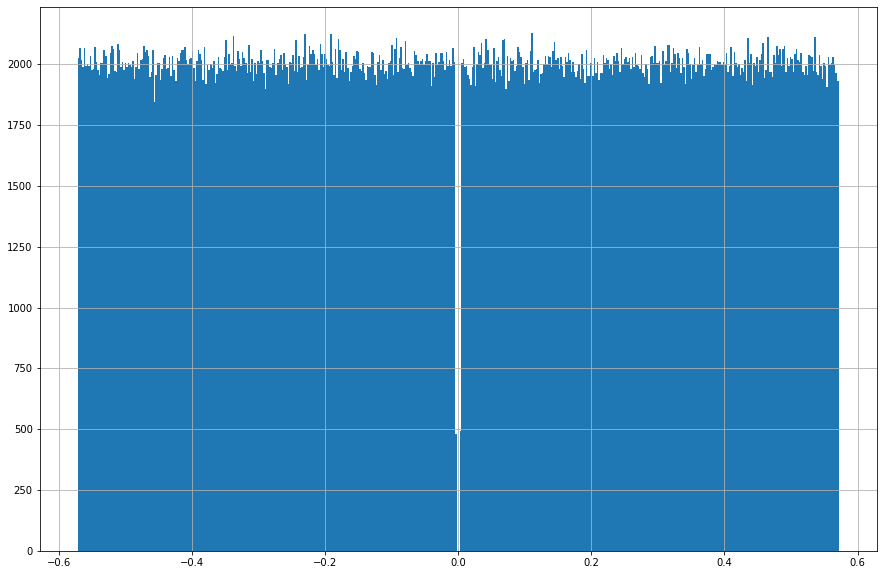

In [61]:
labels.hist(bins=int(2/0.004), figsize=(15,10))

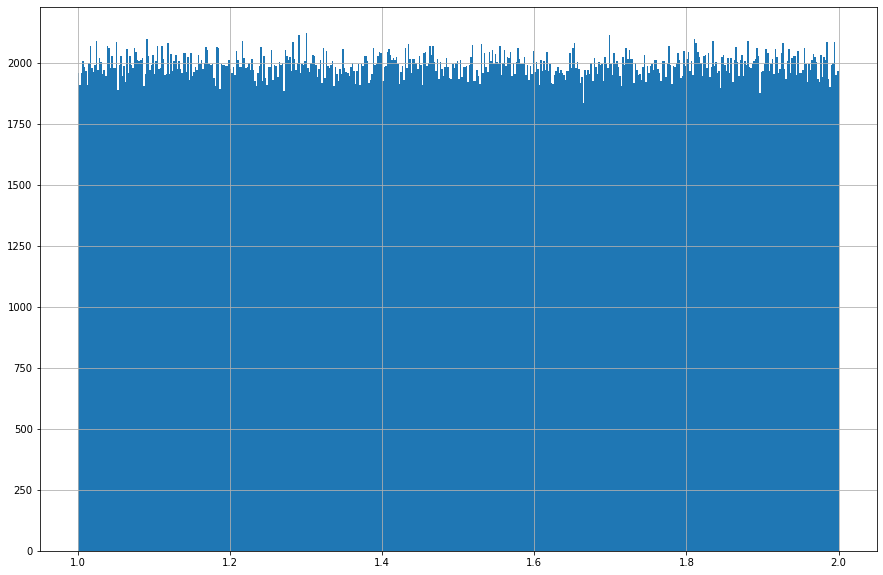

In [62]:
e.hist(bins=500, figsize=(15,10))

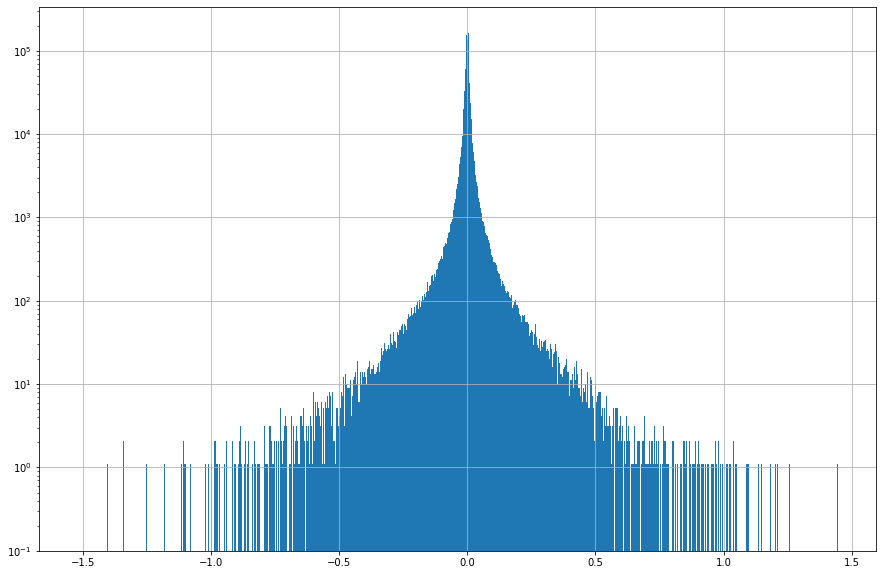

In [63]:
fig, ax = plt.subplots(figsize=(15,10))
pt_x.hist(ax=ax, bins=1000, bottom=0.1)
ax.set_yscale('log')

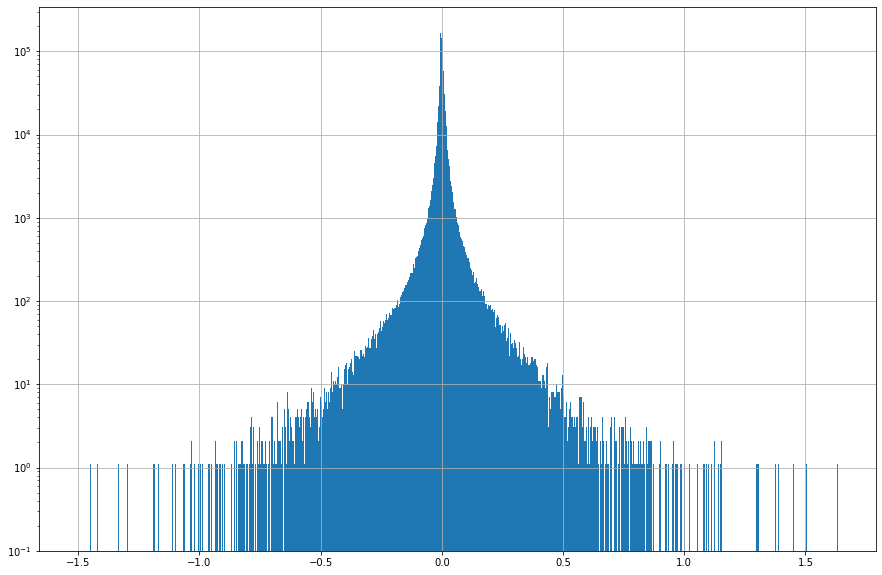

In [64]:
fig, ax = plt.subplots(figsize=(15,10))
pt_y.hist(ax=ax, bins=1000, bottom=0.1)
ax.set_yscale('log')

Von kappa_min bis kappa_max alles abgedeckt. Dass es um 0 rum keine Werte gibt, liegt an kappa_min > 0.

In [65]:
file.iloc[:, int(file.shape[1]/2)].nunique()

1025

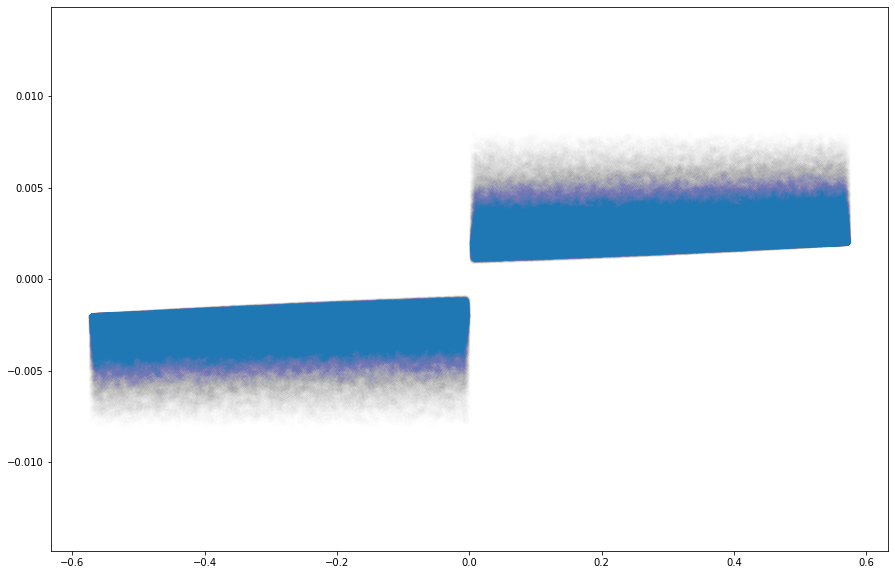

In [66]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(labels, r*labels, alpha=0.002)

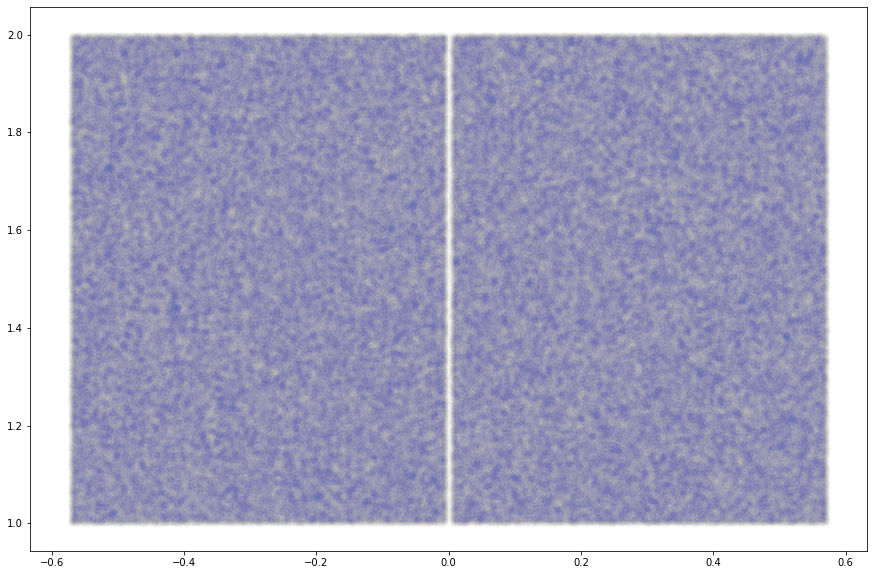

In [67]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(labels, e, alpha=0.002)

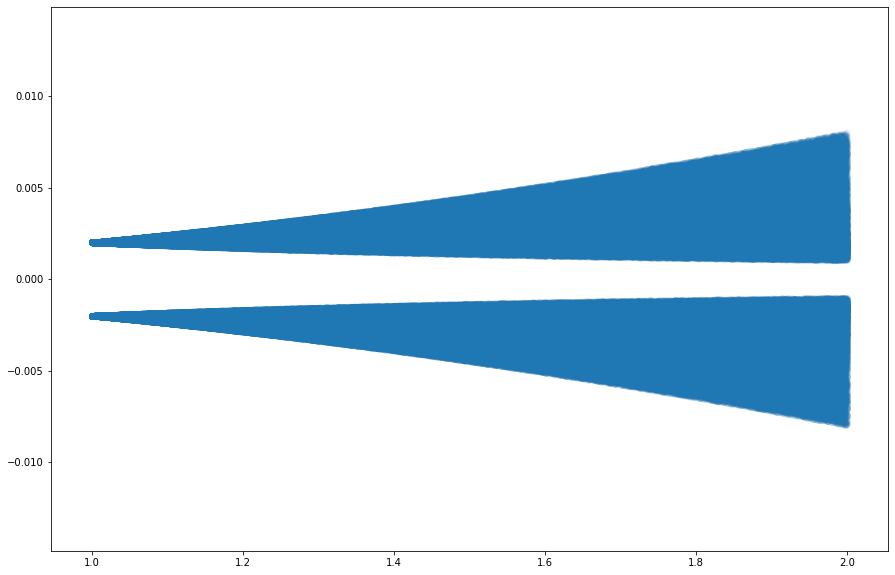

In [68]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(e, r*labels, alpha=0.05)
# ax.set_yscale('log')

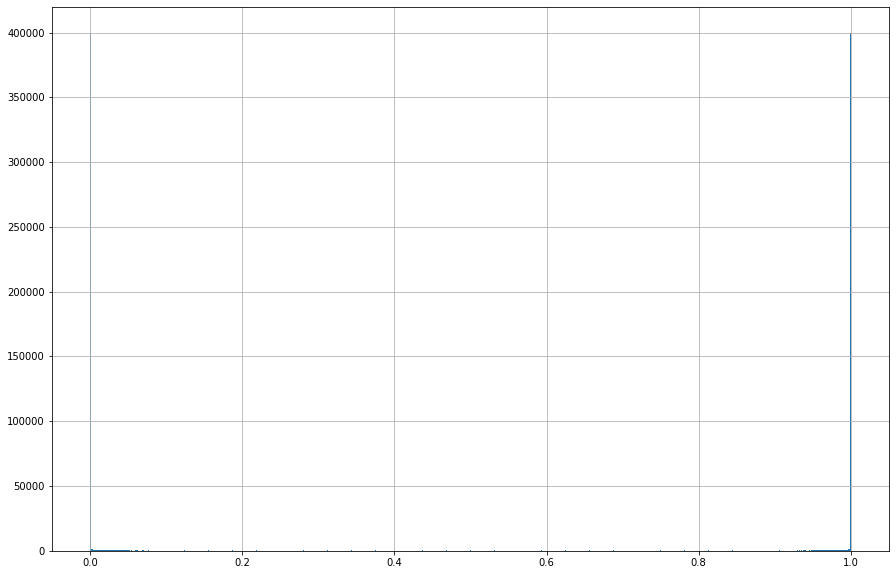

In [69]:
file.iloc[:, int(file.shape[1]/2)].hist(bins=1023, figsize=(15,10))

Die Spikes sind etwas seltsam, hängen auch von der Wahl der Auflösung des Histogramms ab.

In [70]:
sum = file.sum(axis=1)
sum.nunique()

996332

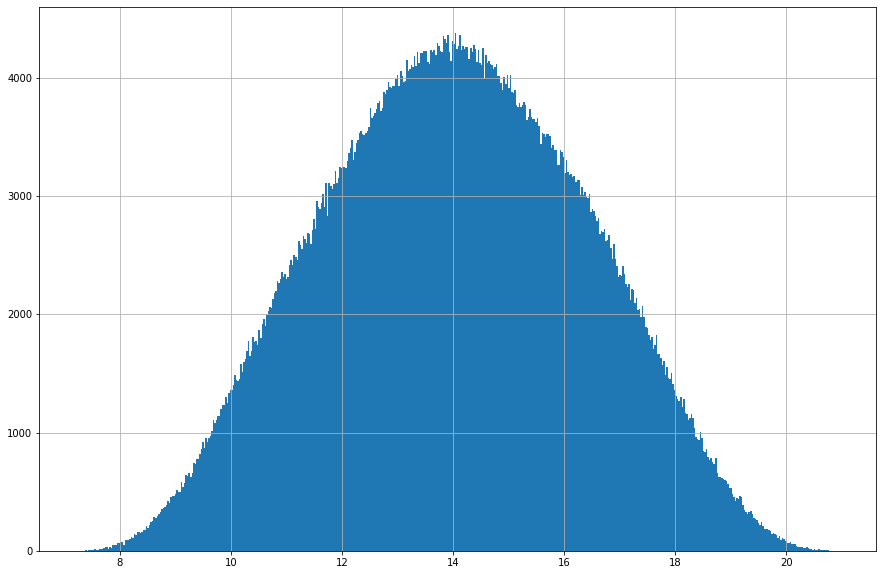

In [71]:
sum.hist(bins=500, figsize=(15, 10))